**Aim:**

The Aim of this project was to develop a predictive model capable of forecasting whether the Tesla stock price will increase or decrease based on historical market data of 1 month .

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/Data - STOCK_US_XNAS_TSLA _24.csv')


In [ ]:
print(df)

          Date    Open    High     Low   Close       Volume
0   09/24/2024  254.08  257.19  249.05  254.27   88,491,000
1   09/23/2024  242.61  250.00  241.92  250.00   86,927,195
2   09/20/2024  241.52  243.99  235.92  238.25   99,879,070
3   09/19/2024  234.00  244.24  232.13  243.92  102,694,602
4   09/18/2024  230.09  235.68  226.88  227.20   78,010,203
5   09/17/2024  229.45  234.57  226.55  227.87   66,761,641
6   09/16/2024  229.30  229.96  223.53  226.78   54,323,000
7   09/13/2024  228.00  232.67  226.32  230.29   59,515,113
8   09/12/2024  224.66  231.45  223.83  229.81   72,020,039
9   09/11/2024  224.55  228.47  216.80  228.13   83,548,633
10  09/10/2024  220.07  226.40  218.64  226.17   78,891,133
11  09/09/2024  216.20  219.87  213.67  216.27   67,443,523
12  09/06/2024  232.60  233.60  210.51  210.73  112,177,000
13  09/05/2024  223.49  235.00  222.25  230.17  119,355,000
14  09/04/2024  210.59  222.22  210.57  219.41   80,651,766
15  09/03/2024  215.26  219.90  209.64  

In [ ]:
df.shape

(21, 6)

In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume
0,09/24/2024,254.08,257.19,249.05,254.27,"88,491,000"
1,09/23/2024,242.61,250.00,241.92,250.00,"86,927,195"
2,09/20/2024,241.52,243.99,235.92,238.25,"99,879,070"
3,09/19/2024,234.00,244.24,232.13,243.92,"102,694,602"
4,09/18/2024,230.09,235.68,226.88,227.20,"78,010,203"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    21 non-null     object 
 1   Open    21 non-null     float64
 2   High    21 non-null     float64
 3   Low     21 non-null     float64
 4   Close   21 non-null     float64
 5   Volume  21 non-null     object 
dtypes: float64(4), object(2)
memory usage: 1.1+ KB


In [ ]:
df['Volume'] = df['Volume'].str.replace(',', '').astype(int) # Remove commas before converting to integer

In [ ]:
df.describe()

,Open,High,Low,Close,Volume
count,21.000000,21.000000,21.000000,21.000000,2.100000e+01
mean,224.600952,229.583810,220.083333,224.687143,7.805519e+07
std,12.152705,12.320307,12.540384,13.901154,1.817421e+07
min,208.630000,211.840000,202.590000,205.750000,5.432300e+07
25%,215.260000,219.870000,210.510000,213.210000,6.337061e+07
50%,224.550000,229.960000,218.640000,226.780000,7.655180e+07
75%,230.090000,235.000000,226.550000,230.170000,8.692720e+07
max,254.080000,257.190000,249.050000,254.270000,1.193550e+08


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    21 non-null     object 
 1   Open    21 non-null     float64
 2   High    21 non-null     float64
 3   Low     21 non-null     float64
 4   Close   21 non-null     float64
 5   Volume  21 non-null     int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 1.1+ KB


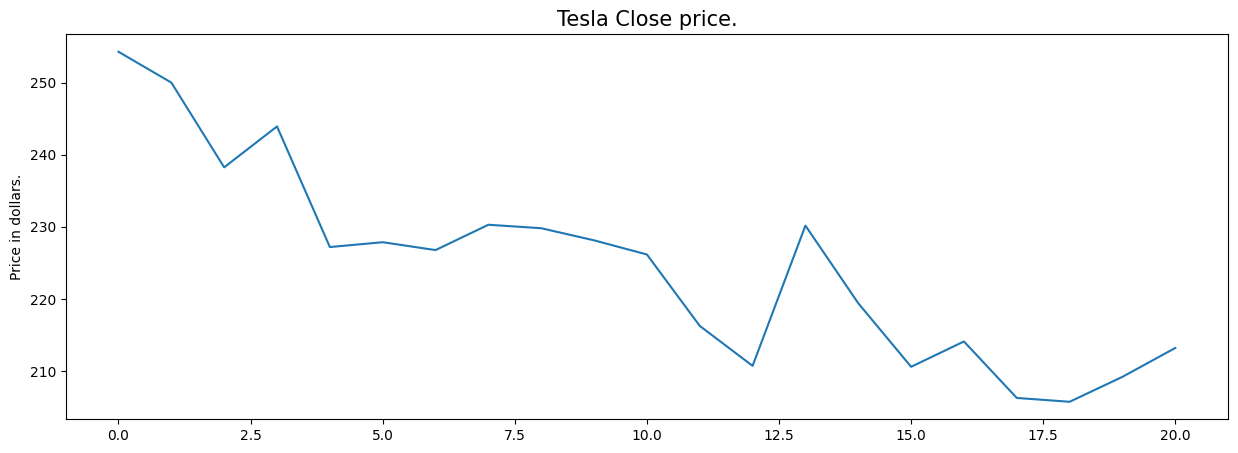

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Tesla Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()
# explain points  in graph  as it goes above and down


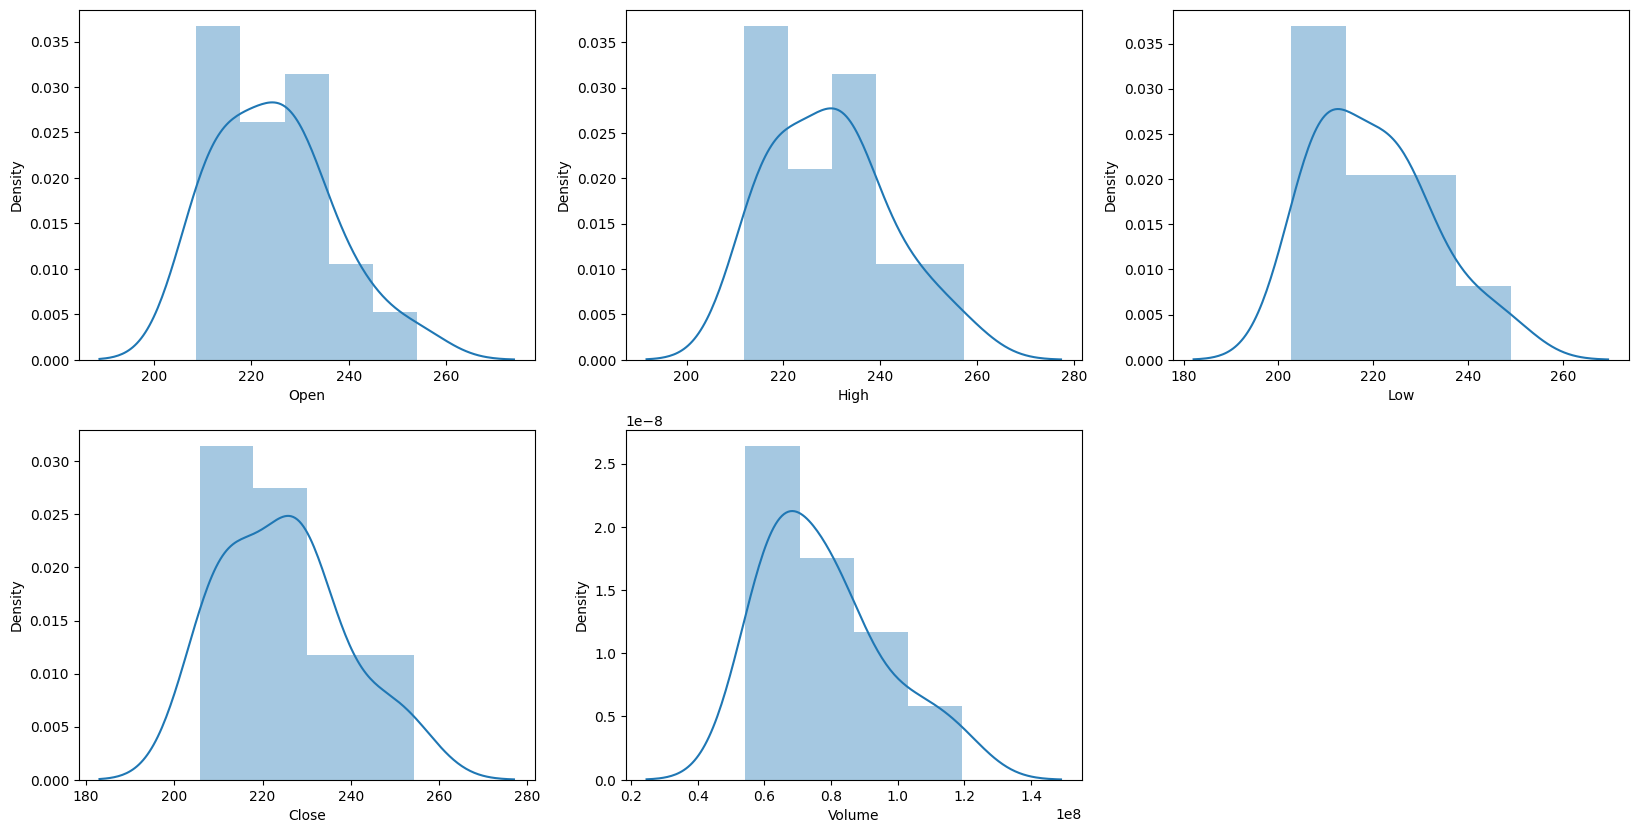

In [ ]:
features = ['Open', 'High', 'Low', 'Close','Volume']
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.distplot(df[col])
plt.show()

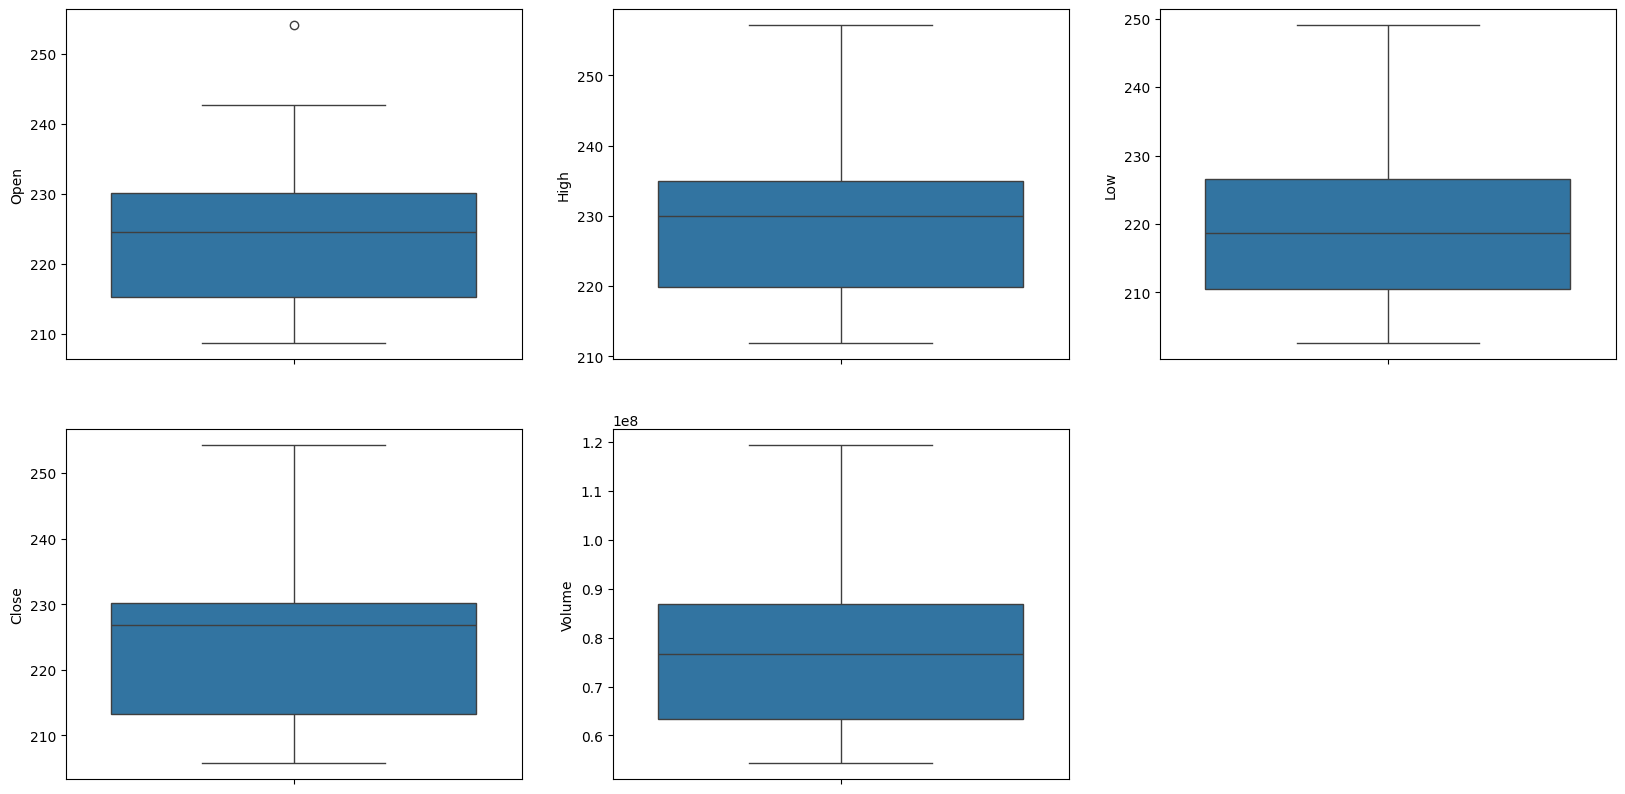

In [ ]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.boxplot(df[col])
plt.show()

In [ ]:
splitted = df['Date'].str.split('/', expand=True)

df['day'] = splitted[1].astype('int')
df['month'] = splitted[0].astype('int')
df['year'] = splitted[2].astype('int')

df.tail()

,Date,Open,High,Low,Close,Volume,day,month,year
16,08/30/2024,208.63,214.57,207.03,214.11,63370609,30,8,2024
17,08/29/2024,209.80,214.89,205.97,206.28,62308820,29,8,2024
18,08/28/2024,209.72,211.84,202.59,205.75,64116352,28,8,2024
19,08/27/2024,213.25,215.66,206.94,209.21,62821391,27,8,2024
20,08/26/2024,218.75,219.09,211.01,213.21,59301191,26,8,2024


In [ ]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

,Date,Open,High,Low,Close,Volume,day,month,year,is_quarter_end
0,09/24/2024,254.08,257.19,249.05,254.27,88491000,24,9,2024,1
1,09/23/2024,242.61,250.00,241.92,250.00,86927195,23,9,2024,1
2,09/20/2024,241.52,243.99,235.92,238.25,99879070,20,9,2024,1
3,09/19/2024,234.00,244.24,232.13,243.92,102694602,19,9,2024,1
4,09/18/2024,230.09,235.68,226.88,227.20,78010203,18,9,2024,1


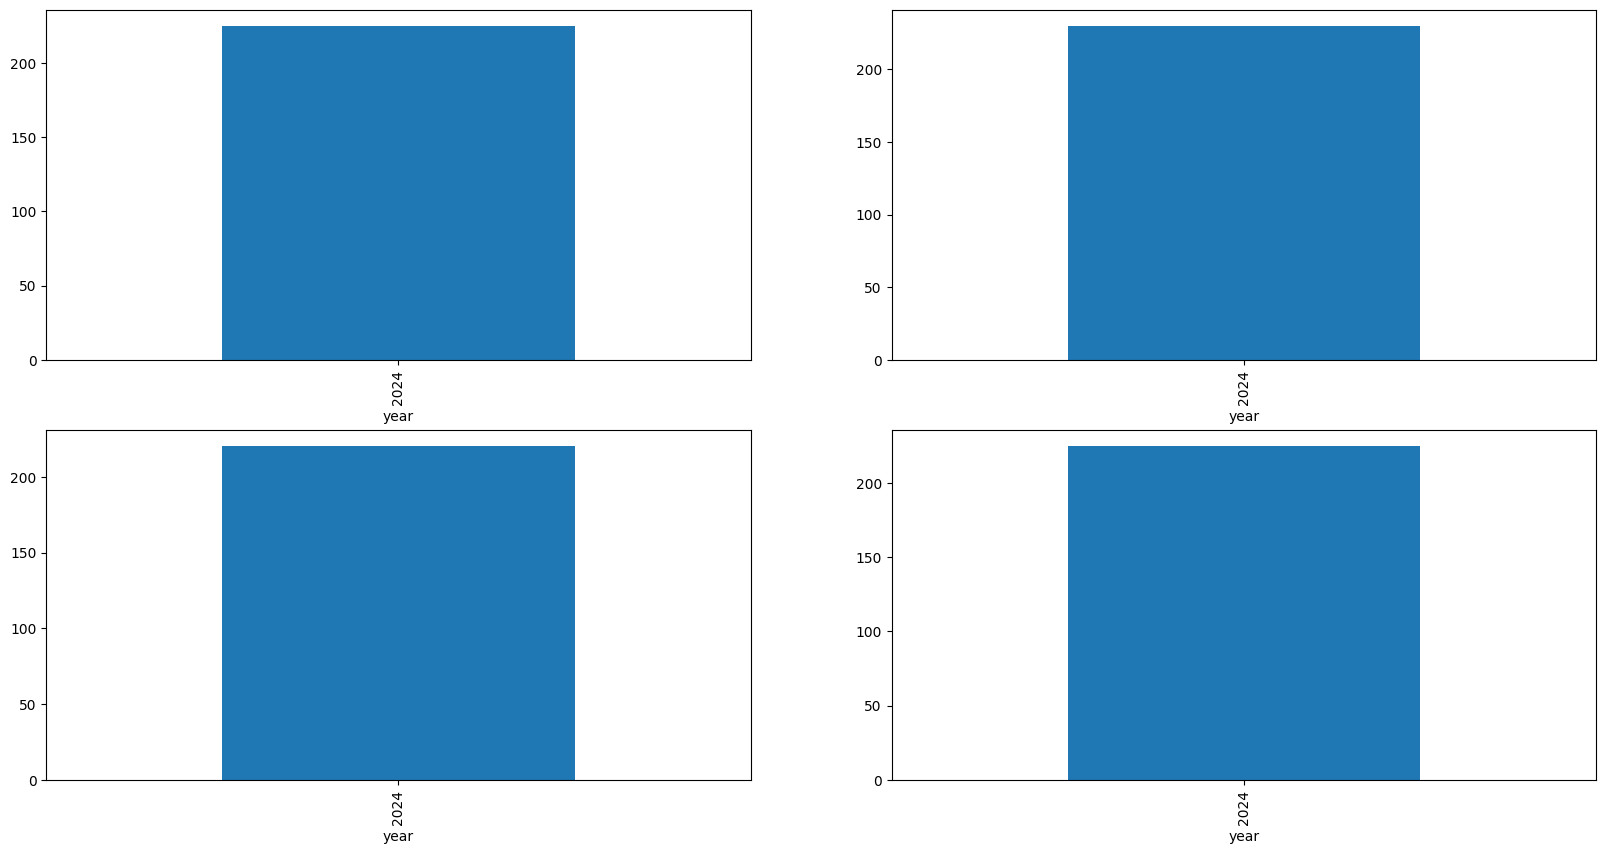

In [ ]:
data_grouped = df.drop('Date', axis=1).groupby('year').mean()
plt.subplots(figsize=(20,10))

for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

In [ ]:
df.drop('Date', axis=1).groupby('is_quarter_end').mean()

,Open,High,Low,Close,Volume,day,month,year
is_quarter_end,,,,,,,,
0,212.030000,215.210000,206.708000,209.712000,6.238367e+07,28.000,8.0,2024.0
1,228.529375,234.075625,224.263125,229.366875,8.295254e+07,13.125,9.0,2024.0


In [ ]:
df['open-close'] = df['Open'] - df['Close']
df['low-high'] = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

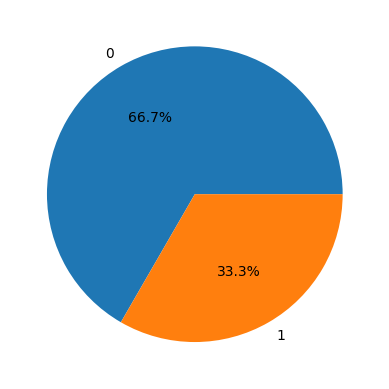

In [ ]:
plt.pie(df['target'].value_counts().values,
		labels=[0, 1], autopct='%1.1f%%')
plt.show()

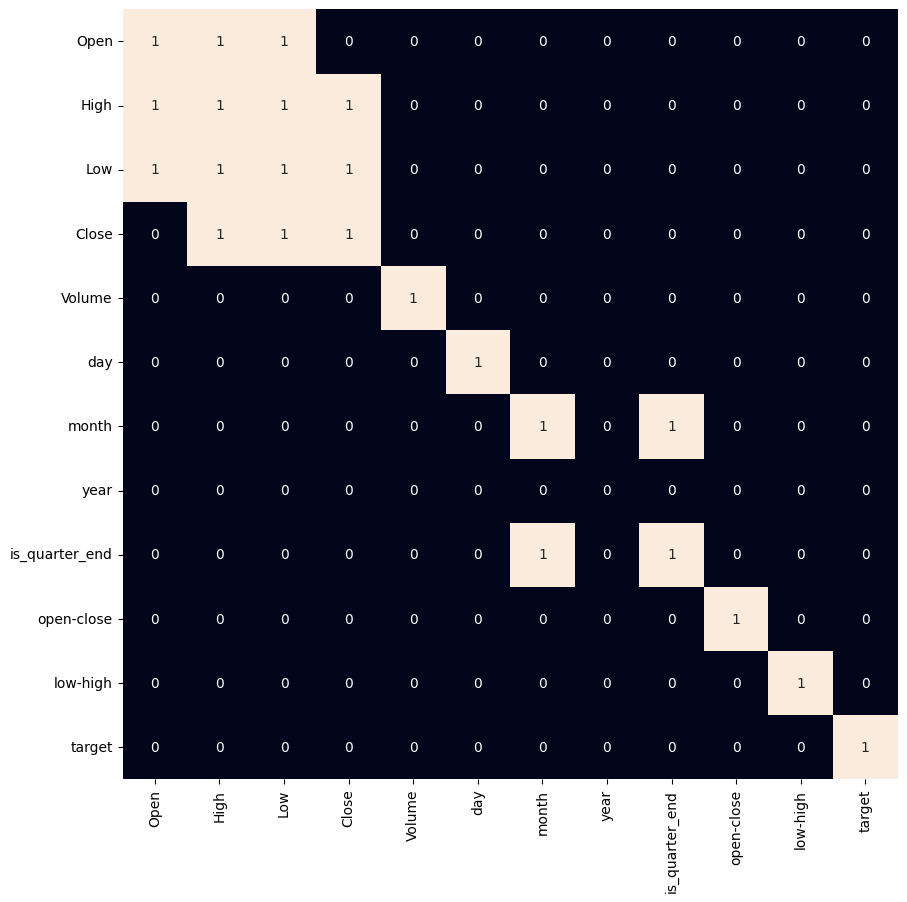

In [ ]:
plt.figure(figsize=(10, 10))

# As our concern is with the highly
# correlated features only so, we will visualize
# our heatmap as per that criteria only.
sb.heatmap(df.drop('Date', axis=1).corr() > 0.9, annot=True, cbar=False)
plt.show()

In [ ]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
	features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

(18, 3) (3, 3)


 Model Coefficients------------------------------------------------------------------------------------------------------------

Model Coefficients:
          Feature  Coefficient
0      open-close     2.454719
1        low-high     0.000000
2  is_quarter_end     0.000000

 Confusion Matrix------------------------------------------------------------------------------------------------------------


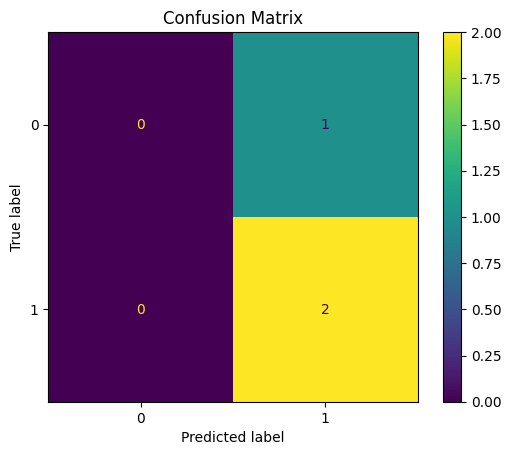


Classification Report------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      1.00      0.80         2

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3


 ROC Curve and AUC------------------------------------------------------------------------------------------------------------


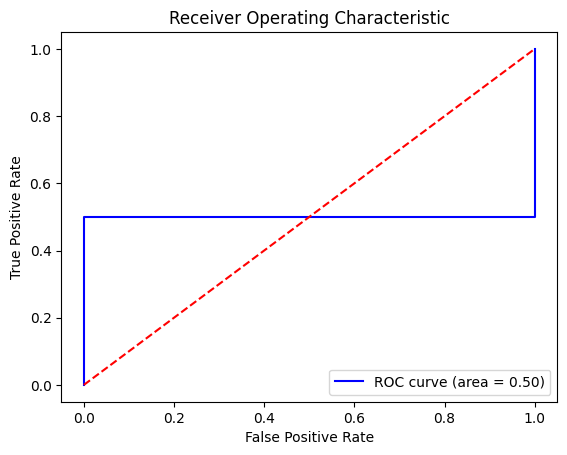


Precision-Recall Curve------------------------------------------------------------------------------------------------------------


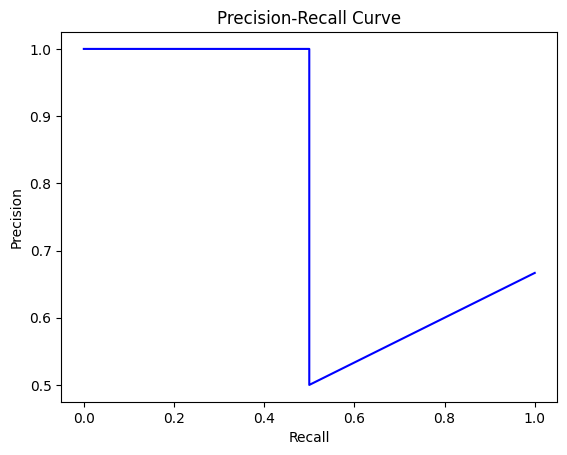


Cross-Validation Score------------------------------------------------------------------------------------------------------------
Cross-Validated AUC: 1.00 ± 0.00


In [ ]:
model = LogisticRegression(penalty='l1', solver='saga', C=1.0)
model.fit(X_train, Y_train)


print(" Model Coefficients------------------------------------------------------------------------------------------------------------")
print()
# 1. Model Coefficients
coefficients = model.coef_[0]
feature_importance = pd.DataFrame({'Feature': ['open-close', 'low-high', 'is_quarter_end'], 'Coefficient': coefficients})
print("Model Coefficients:")
print(feature_importance)
print()
print(" Confusion Matrix------------------------------------------------------------------------------------------------------------")

# 2. Confusion Matrix
Y_pred = model.predict(X_valid)
confusion_matrix = metrics.confusion_matrix(Y_valid, Y_pred)
ConfusionMatrixDisplay(confusion_matrix).plot()
plt.title("Confusion Matrix")
plt.show()

print()
print("Classification Report------------------------------------------------------------------------------------------------------------")
# 3. Classification Report
classification_report = metrics.classification_report(Y_valid, Y_pred)
print(classification_report)


print()
print(" ROC Curve and AUC------------------------------------------------------------------------------------------------------------")
# 4. ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(Y_valid, model.predict_proba(X_valid)[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()
print()


print("Precision-Recall Curve------------------------------------------------------------------------------------------------------------")
# 5. Precision-Recall Curve
precision_vals, recall_vals, _ =precision_recall_curve(Y_valid, model.predict_proba(X_valid)[:, 1])
plt.figure()
plt.plot(recall_vals, precision_vals, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()
print()
print("Cross-Validation Score------------------------------------------------------------------------------------------------------------")


# 6. Cross-Validation Score
cross_val_scores = cross_val_score(model, X_train, Y_train, cv=5, scoring='roc_auc')
print(f"Cross-Validated AUC: {np.mean(cross_val_scores):.2f} ± {np.std(cross_val_scores):.2f}")



In [ ]:
def predict_stock_price(open_price, high_price, low_price, close_price, volume, is_quarter_end):
  """Predicts whether the stock price will increase or decrease."""
  open_close = open_price - close_price
  low_high = low_price - high_price
  features = [[open_close, low_high, is_quarter_end]]

  # Scale the features using the same scaler used during training
  features = scaler.transform(features)

  # Make prediction using the trained model
  prediction = models[0].predict(features)[0]

  return prediction

def get_prediction_with_reason(company_name, open_price, high_price, low_price, close_price, volume, is_quarter_end):
  """Generates prediction with reasoning for a company."""

  prediction = predict_stock_price(open_price, high_price, low_price, close_price, volume, is_quarter_end)

  if prediction == 1:
    reason_increase = f"The stock price of {company_name} is likely to increase because our model predicts a positive trend based on current market conditions."
    return "Increase", reason_increase
  else:
    reason_decrease = f"The stock price of {company_name} is likely to decrease because our model predicts a negative trend based on current market conditions."
    return "Decrease", reason_decrease

random_row = df.sample()

open_price = random_row['Open'].values[0]
high_price = random_row['High'].values[0]
low_price = random_row['Low'].values[0]
close_price = random_row['Close'].values[0]
volume = random_row['Volume'].values[0]
is_quarter_end = random_row['is_quarter_end'].values[0]

prediction_result, reason = get_prediction_with_reason(company_name, open_price, high_price, low_price, close_price, volume, is_quarter_end)

print(f"Prediction: {prediction_result}")
print(f"Reason: {reason}")

Prediction: Decrease
Reason: The stock price of Tesla is likely to decrease because our model predicts a negative trend based on current market conditions.




### Conclusion

In this project, we set out to predict whether Tesla's stock price would go up or down using a Logistic Regression model. Here are some key takeaways from our work:

1. **Model Performance**: Our model achieved an accuracy of 67%, which is a solid start. The precision was also 67%, meaning that when the model predicted an increase in stock price, it was correct about two-thirds of the time. Impressively, it had a perfect recall of 100%, indicating that it successfully identified all actual increases.

2. **Balanced Metrics**: The F1-score of 0.80 shows that the model does a good job of balancing precision and recall. This is important because we want to ensure we’re not just identifying trends but doing so accurately.

3. **Feature Engineering**: We used features like the difference between opening and closing prices, the range of prices during the day, and whether the date fell at the end of a quarter. These features helped improve the model's performance and provided valuable insights.

4. **Evaluation Insights**: The evaluation metrics, including the confusion matrix and ROC curve, offered a comprehensive view of how well the model performed. The ROC AUC score suggested that the model has good potential to differentiate between price movements.

5. **Method for Improvement**: While the results are promising, there's definitely room for enhancement. Exploring other algorithms like SVM or XGBoost, as well as incorporating additional features—like news sentiment or economic indicators—could lead to even better predictions.

6.**Benefits**: The insights from this model can be really useful for investors and analysts trying to navigate the ups and downs of Tesla’s stock. Having a predictive tool could help them make more informed decisions.




In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume,day,month,year,is_quarter_end,open-close,low-high,target
0,09/24/2024,254.08,257.19,249.05,254.27,88491000,24,9,2024,1,-0.19,-8.14,0
1,09/23/2024,242.61,250.00,241.92,250.00,86927195,23,9,2024,1,-7.39,-8.08,0
2,09/20/2024,241.52,243.99,235.92,238.25,99879070,20,9,2024,1,3.27,-8.07,1
3,09/19/2024,234.00,244.24,232.13,243.92,102694602,19,9,2024,1,-9.92,-12.11,0
4,09/18/2024,230.09,235.68,226.88,227.20,78010203,18,9,2024,1,2.89,-8.80,1



**Dataset Explanation:**
The dataset appears to contain historical stock price data for Tesla (TSLA) traded on the Nasdaq stock exchange.
Here's a breakdown of the key columns and their potential significance:

Column Name | Description
---|---|
Date | The date of the stock market data entry.
Open | The opening price of the stock for the given day.
High | The highest price the stock reached during the day.
Low | The lowest price the stock reached during the day.
Close | The closing price of the stock for the day.
Volume | The number of shares traded during the day.
Year | Extracted year from the date column.
Month | Extracted month from the date column.
Day | Extracted day from the date column.
is_quarter_end | Binary indicator marking if the trading date falls at the end of a quarter.
open-close | Difference between opening and closing prices.
low-high | Difference between the lowest and highest prices for the day.
target | A binary variable indicating if the stock price will increase or decrease on the next day (1 for increase, 0 for decrease).

Dataset Characteristics:
The dataset seems to be time-series data, which is frequently used in finance for predicting future outcomes.
It provides several relevant features that can be used to analyze trends and potentially predict future prices.
